<a href="https://colab.research.google.com/github/dhayomax/2023-DSN-AI-Bootcamp-Hackathon/blob/main/House_Price_Prediction_(Wazobia_Estate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 01. IMPORT REQUIRED LIBRARIES...

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# 02. LOAD THE DATA

In [4]:
# filepath to the dataset
train_filepath = '/content/gdrive/MyDrive/Bootcamp Hackathon/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_train.csv'
test_filepath = '/content/gdrive/MyDrive/Bootcamp Hackathon/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv'
sample_filepath = '/content/gdrive/MyDrive/Bootcamp Hackathon/free-ai-classes-in-every-city-hackathon-2023/Sample_submission.csv'

In [5]:
# reading the data format
train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)
Sample_submission = pd.read_csv(sample_filepath)

## 02.1. Understanding the data

check for the underlying components and properties present in the data

### train

In [7]:
# train data in-view
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


* This tells us that our data comprise of both numeric(integer & float) and strings `datatypes`.

* We have 7 number of columns, where *price* is the `target` column and the rest are the `features` columns

* It appears that they are missing values hence the `NaN`

In [8]:
# shape of train data
train.shape

(14000, 7)

the data contains **14,000** rows and **7** columns

In [10]:
# check for names of unique columns
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [16]:
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

### test

In [12]:
# test data in-view
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


It appears that they're 6 columns here, ommiting the target column `price`

In [13]:
# columns for test data
test.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space'], dtype='object')

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [17]:
test.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

# 03. Exploratory Data Analysis (EDA)


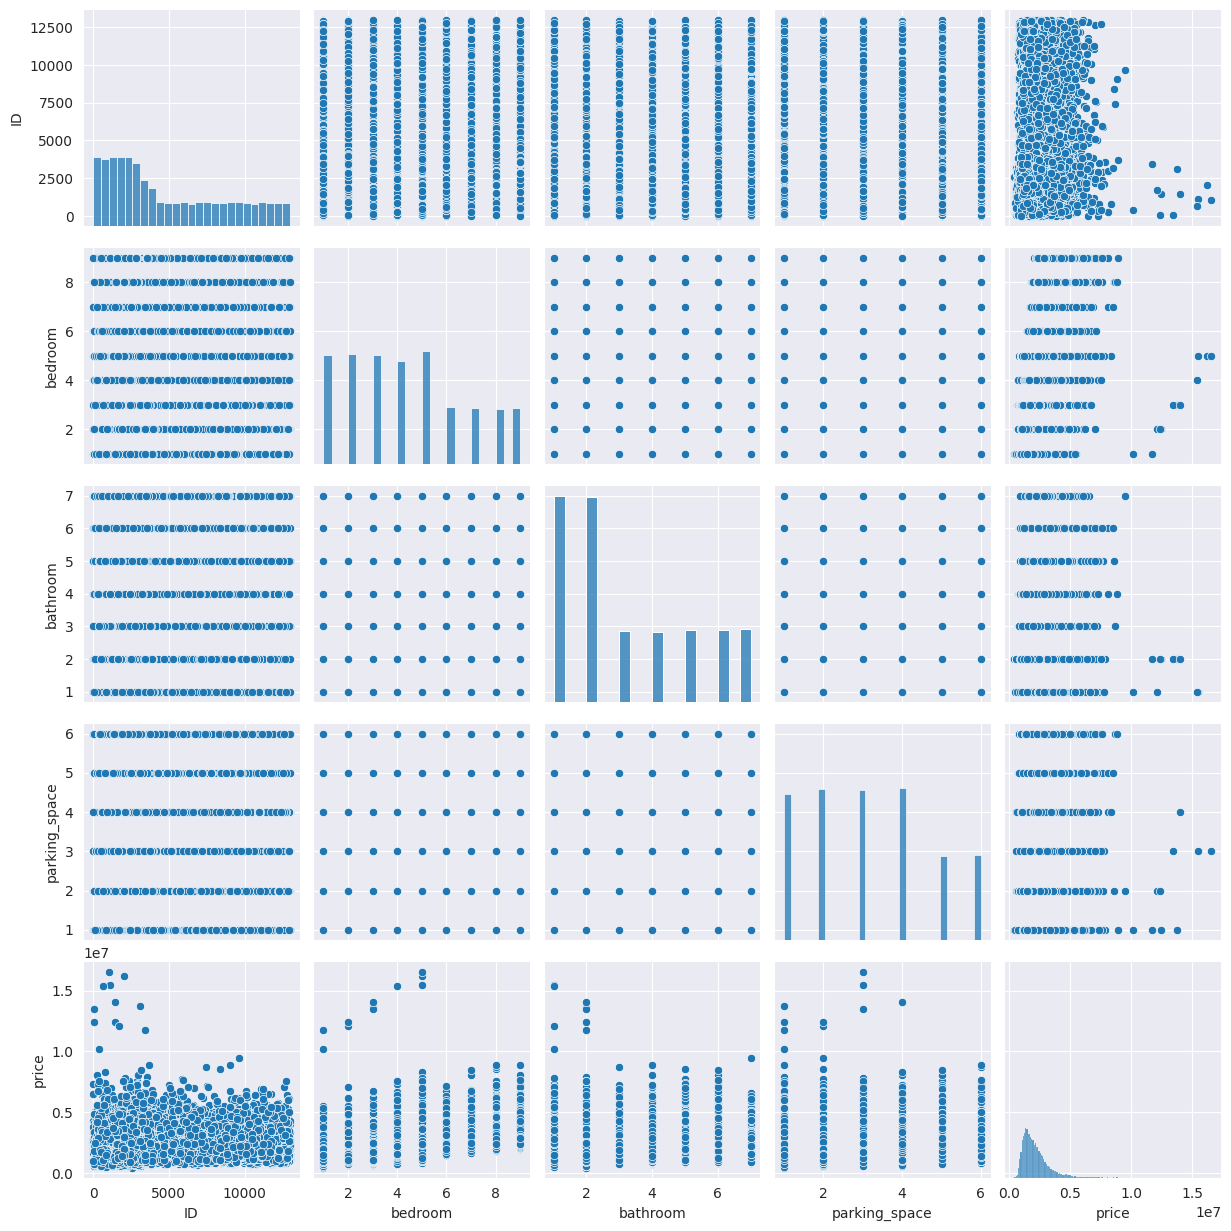

In [19]:
sns.pairplot(train)

<Axes: xlabel='parking_space', ylabel='count'>

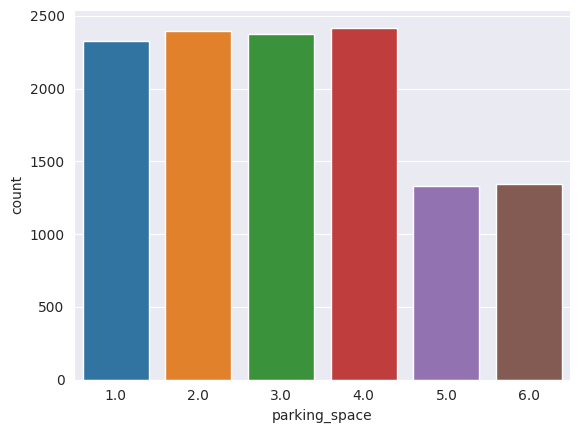

In [20]:
sns.countplot(data = train, x  = 'parking_space')

<Axes: xlabel='bedroom', ylabel='price'>

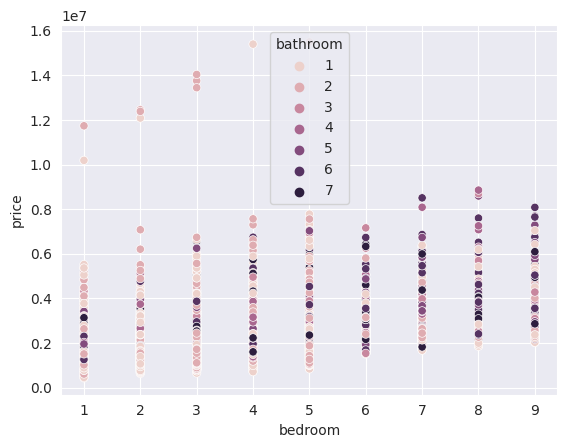

In [21]:
sns.scatterplot(data = train, y  = 'price',x='bedroom', hue = 'bathroom')

# 04. DATA PREPROCESSING

In [26]:
imputer = SimpleImputer(strategy = 'most_frequent')
train[train.columns] = imputer.fit_transform(train)

In [27]:
# label encoding

for i in ['loc', 'title']:
  train[i] = train[i].astype('category')
  test[i] = test[i].astype('category')
  train[i] = train[i].cat.codes
  test[i] = test[i].cat.codes

Type casting the columns to int

In [28]:
train["bedroom"] = train["bedroom"].astype(int)
train["bathroom"] = train["bathroom"].astype(int)
train["parking_space"] = train["parking_space"].astype(int)

In [29]:
test["bedroom"] = test["bedroom"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["parking_space"] = test["parking_space"].astype(int)

In [30]:
X,y = train.drop(['ID','price'],axis = 1), train['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = .2)

# 05. TRAIN MODEL

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
mean_squared_error(y_test, preds, squared = False) #rmse

689916.7269768876

In [32]:
sub_file = pd.DataFrame({
    'ID': test.ID,
    'price': rf.predict(test[X.columns])
})

sub_file.to_csv('submission1.csv', index = False)